## 15.2- Caso de Estudio - Clasificación

### 15.2.1.- Cargar el dataset

Carga load_diabetes desde sklearn.datasets y luego metelo en un objeto

In [1]:
from sklearn.datasets import load_diabetes

Imprime la descripcion del dataset

In [2]:
diabetes = load_diabetes()

In [3]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

Checa el target de tu nuevo objeto diabetes

In [4]:
diabetes.target[::5]  # Una muestra de la PROGRESIÓN DE LA ENFERMEDAD (target) cada 5 pacientes.

array([151.,  97., 101., 171.,  68., 202., 129., 102., 100.,  53., 155.,
       128.,  61., 163.,  48.,  42., 143., 141.,  98., 162., 128.,  53.,
       104., 229., 200., 161., 274., 272., 118., 259., 288., 186.,  53.,
        59.,  47., 127., 107., 101., 292., 122., 158.,  99., 191., 263.,
        78., 208., 220., 124., 275., 125., 303., 153.,  39.,  74., 202.,
        94., 265., 233., 332.,  85., 275., 124., 109.,  97., 122., 192.,
       244.,  96., 216., 139., 243.,  60., 281., 206.,  63., 217.,  52.,
       219., 277., 258., 175., 281., 209., 174., 146., 152., 183.,  64.,
       220.])

Ahora prueba revisando la forma del arreglo vinos

In [5]:
diabetes.data.shape  # Estructura de datos: (número de muestras de pacientes, número de características fisiológicas)

(442, 10)

Y la forma del arreglo target

In [6]:
diabetes.target.shape  # La forma del vector de etiquetas (el valor de progresión de la enfermedad para cada paciente).

(442,)

Ahora veamos el .data para ver el arreglo en 1x64

In [7]:
diabetes.data[15]  # Características fisiológicas y de salud del paciente 15.

array([-0.05273755,  0.05068012, -0.01806189,  0.08040085,  0.08924393,
        0.10766179, -0.03971921,  0.1081111 ,  0.03606033, -0.04249877])

### 15.2.2.- Visualizar los datos

Veamos los datos utilizando matplotlib, comienza importando esta libreria

In [8]:
import matplotlib.pyplot as plt

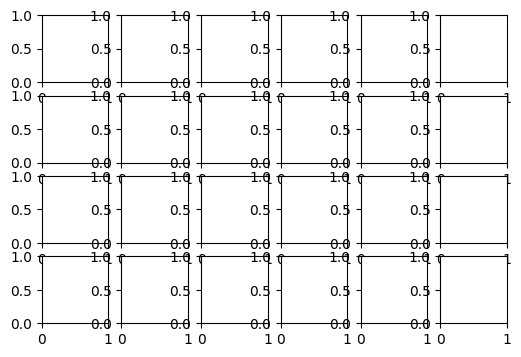

In [9]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(6, 4))

Ahor adibuja una cuadricula para lograr tu cometido

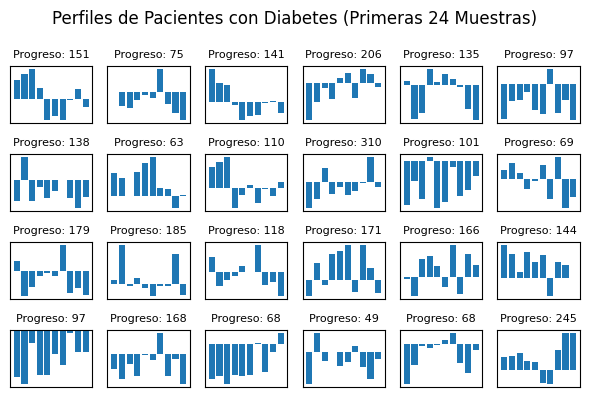

In [10]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(6, 4))

for ax, data, target in zip(axes.ravel(), diabetes.data[:24], diabetes.target[:24]):
    
    # Gráfico de barras de las 10 características (el perfil del paciente)
    ax.bar(range(len(data)), data)
    
    # Limpieza visual
    ax.set_xticks([]) # Eliminar marcas del eje X
    ax.set_yticks([]) # Eliminar marcas del eje Y
    ax.set_title(f"Progreso: {target:.0f}", fontsize=8)

plt.suptitle('Perfiles de Pacientes con Diabetes (Primeras 24 Muestras)', fontsize=12)
plt.tight_layout()
plt.show()

a continuación, vamos a usar un for paraiterar en paralelo a traves de los 24 cuadritos y traer las priemras 24 imagenes

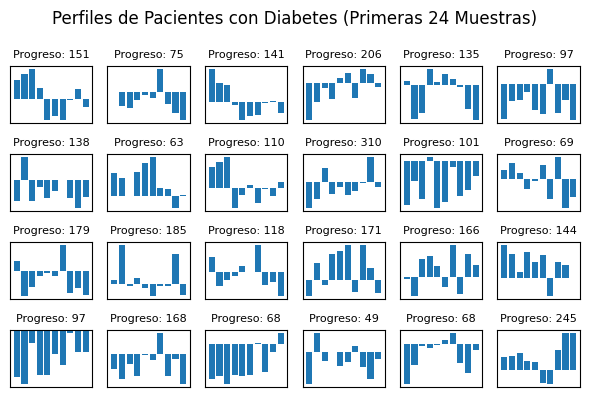

In [11]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(6, 4))

for ax, data, target in zip(axes.ravel(), diabetes.data[:24], diabetes.target[:24]):
    
    # Gráfico de barras de las 10 características (el perfil del paciente)
    ax.bar(range(len(data)), data)
    
    # Limpieza visual
    ax.set_xticks([])
    ax.set_yticks([]) 
    ax.set_title(f"Progreso: {target:.0f}", fontsize=8)

plt.suptitle('Perfiles de Pacientes con Diabetes (Primeras 24 Muestras)', fontsize=12)
plt.tight_layout()
plt.show()

### 15.2.3.- Separar el dataset para entrenamientos y pruebas

ok, ahora vamos a importar train_test_split desde sklearn.model_selection

In [12]:
from sklearn.model_selection import train_test_split

Y a continuación generar el split entre test y train

In [13]:
X_train, X_test, y_train,y_test = train_test_split(diabetes.data,diabetes.target,random_state=11) 
#Damos los datos divididos entre entrenamiento (X_train) y prueba (X_test),,,, los objetivos(target(etiquetas)) van a "y_train e y_test"
#random_state es la semilla del randomizer

Veamos las shapes de nuestros sets para X (muestras)

In [14]:
X_train.shape #Datos de entrenamiento (75%) (Por defecto, al no configurarlo)

(331, 10)

In [15]:
X_test.shape #Datos de prueba (25%) (Por defecto, al no configurarlo)

(111, 10)

### 15.2.4.- Crear el modelo

Ahora importamos el KNeighborsClassifier

In [16]:
from sklearn.neighbors import KNeighborsClassifier

y armamos un objeto llamado KNN de este Clasificador

In [17]:
knn = KNeighborsClassifier() 
# Estimador de vecinos más cercanos (K-Nearest Neighbors).
# La lógica se basa en la 'democracia': clasifica un nuevo punto de dato 
# asignándole la clase más común entre sus 'K' vecinos más cercanos en el espacio de características.

### 15.2.5.- Entrenar el modelo

Ahora arma el método fit para cargar los datos en el estimador

In [18]:
knn.fit(X=X_train, y=y_train)
# ENTRENAMIENTO: El modelo aprende las relaciones entre las características (X_train) y las etiquetas (y_train).

C:\Users\Abri\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\multiclass.py:213: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  y_type = type_of_target(y, input_name="y")


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


### 15.2.6.- Predecir clases de dígitos

Arma un objeto llamdo prediccion

In [19]:
prediccion = knn.predict(X=X_test)
# El modelo KNN genera las etiquetas o valores predichos para los datos de prueba (X_test).

Arma un objeto llamado esperado

In [20]:
esperado = y_test

Comparemos predicho vs esperado

In [21]:
prediccion[:20] # Muestra las primeras 20 etiquetas o valores predichos por el modelo KNN (la salida de la estimación de ML).

array([ 49.,  53.,  49., 111.,  52., 131.,  49., 246.,  25.,  31., 103.,
       220.,  53.,  59.,  49.,  48.,  48.,  49.,  77.,  65.])

In [22]:
esperado[:20] # Muestra los primeros 20 valores REALES del objetivo (y_test) con los que se compararán las predicciones.

array([ 79.,  55., 109., 178.,  39., 321., 158., 132.,  52., 201.,  95.,
       303.,  96.,  60.,  72.,  60.,  59.,  73., 257.,  84.])

armamos una comprension de lista para localizar todas las predicciones incorrectas

In [23]:
list_incorrectas =[]
for i in range(len(esperado)):
    if prediccion[i] != esperado[i]:
        list_incorrectas.append(prediccion[i])
        print(f'Esperado: {esperado[i]}, Predicción: {prediccion[i]}')
# Itera sobre todas las muestras de prueba y compara la predicción con el valor real.
# Si la predicción NO ES EXACTAMENTE IGUAL al valor esperado, la registra como incorrecta y la imprime.

Esperado: 79.0, Predicción: 49.0
Esperado: 55.0, Predicción: 53.0
Esperado: 109.0, Predicción: 49.0
Esperado: 178.0, Predicción: 111.0
Esperado: 39.0, Predicción: 52.0
Esperado: 321.0, Predicción: 131.0
Esperado: 158.0, Predicción: 49.0
Esperado: 132.0, Predicción: 246.0
Esperado: 52.0, Predicción: 25.0
Esperado: 201.0, Predicción: 31.0
Esperado: 95.0, Predicción: 103.0
Esperado: 303.0, Predicción: 220.0
Esperado: 96.0, Predicción: 53.0
Esperado: 60.0, Predicción: 59.0
Esperado: 72.0, Predicción: 49.0
Esperado: 60.0, Predicción: 48.0
Esperado: 59.0, Predicción: 48.0
Esperado: 73.0, Predicción: 49.0
Esperado: 257.0, Predicción: 77.0
Esperado: 84.0, Predicción: 65.0
Esperado: 57.0, Predicción: 52.0
Esperado: 222.0, Predicción: 138.0
Esperado: 102.0, Predicción: 65.0
Esperado: 72.0, Predicción: 51.0
Esperado: 292.0, Predicción: 50.0
Esperado: 134.0, Predicción: 59.0
Esperado: 220.0, Predicción: 99.0
Esperado: 198.0, Predicción: 155.0
Esperado: 275.0, Predicción: 78.0
Esperado: 156.0, Pred

In [24]:
incorrectas_list=[(p,e) for (p,e) in zip(prediccion,esperado) if p!=e]
# Crea una lista de tuplas (Predicción, Esperado) para todos los casos donde la predicción NO es exacta.

In [25]:
incorrectas_list #La mostramos

[(np.float64(49.0), np.float64(79.0)),
 (np.float64(53.0), np.float64(55.0)),
 (np.float64(49.0), np.float64(109.0)),
 (np.float64(111.0), np.float64(178.0)),
 (np.float64(52.0), np.float64(39.0)),
 (np.float64(131.0), np.float64(321.0)),
 (np.float64(49.0), np.float64(158.0)),
 (np.float64(246.0), np.float64(132.0)),
 (np.float64(25.0), np.float64(52.0)),
 (np.float64(31.0), np.float64(201.0)),
 (np.float64(103.0), np.float64(95.0)),
 (np.float64(220.0), np.float64(303.0)),
 (np.float64(53.0), np.float64(96.0)),
 (np.float64(59.0), np.float64(60.0)),
 (np.float64(49.0), np.float64(72.0)),
 (np.float64(48.0), np.float64(60.0)),
 (np.float64(48.0), np.float64(59.0)),
 (np.float64(49.0), np.float64(73.0)),
 (np.float64(77.0), np.float64(257.0)),
 (np.float64(65.0), np.float64(84.0)),
 (np.float64(52.0), np.float64(57.0)),
 (np.float64(138.0), np.float64(222.0)),
 (np.float64(65.0), np.float64(102.0)),
 (np.float64(51.0), np.float64(72.0)),
 (np.float64(50.0), np.float64(292.0)),
 (np.flo

## 15.3 Clasificación parte 2 - Dataset de digitos

### 15.3.1.- Metricas para la exactitud del modelo

Usa knn.score para conocer que tan bien se desempeño tu estimador

In [26]:
print(f'{knn.score(X_test, y_test):.2%}')
#calcula el rendimiento del modelo en los datos que no ha visto y lo imprime de forma legible como un porcentaje.

0.90%


C:\Users\Abri\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")


Ahora vamos a ahacer una matriz de confusion para ver los hits y misses para una clase dada, llama la funcion matriz de confusión desde sklearn metricsModule

In [27]:
from sklearn.metrics import confusion_matrix

Y ahora armar tu matriz de confusion

In [28]:
confusion = confusion_matrix(y_true=esperado, y_pred=prediccion)
#calcula esta tabla de rendimiento comparando directamente las predicciones del modelo con los valores reales del conjunto de prueba.

C:\Users\Abri\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
C:\Users\Abri\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\multiclass.py:79: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  ys_types = set(type_of_target(x) for x in ys)


Checa los resultados

In [29]:
confusion 

# La matriz de confusión: Filas representan los valores REALES (y_true) y las Columnas representan los valores PREDICHOS (y_pred).

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(121, 121))

Ahora sigue un reporte de calsificación, importa classification_report desde sklearn.metrics

In [30]:
from sklearn.metrics import classification_report

# Crea una lista con los nombres de las características fisiológicas del dataset de Diabetes.

In [31]:
nombres = [str(diabete) for diabete in diabetes.feature_names]
# Crea una lista 'nombres' convirtiendo cada nombre de característica a formato de cadena (string).

Y termina haciendo tu reporte de clasificacion

In [32]:
nombres

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

y_bin = np.where(diabetes.target > diabetes.target.mean(), 1, 0)

# Separar datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, y_bin, test_size=0.25, random_state=42)

knn.fit(X=X_train, y=y_train) #Evaluación floja (Está cargado pero aún no lo muestra hasta que yo se lo pida)

nombres = ['No diabético', 'Diabético']
prediccion = knn.predict(X=X_test)

print(classification_report(y_test, prediccion, target_names=nombres))

              precision    recall  f1-score   support

No diabético       0.72      0.88      0.79        64
   Diabético       0.76      0.53      0.62        47

    accuracy                           0.73       111
   macro avg       0.74      0.70      0.71       111
weighted avg       0.73      0.73      0.72       111



Y ahora ahremos un heatmap con la matriz de confusion

In [34]:
import pandas as pd

In [35]:
confusion_df = pd.DataFrame(confusion,index = range(121),columns = range(121))

In [36]:
import seaborn as sns

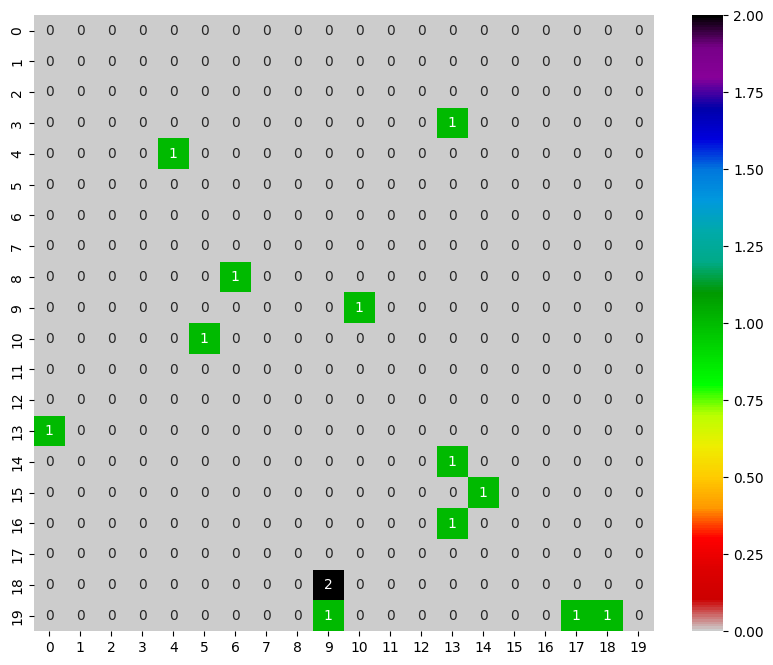

In [37]:
subset = confusion_df.iloc[0:20, 0:20]  # solo filas y columnas 0 a 19, se muestra solo una parte porque sino se verian una matriz ilegible de 121x121
plt.figure(figsize=(10, 8))
axes = sns.heatmap(subset, annot=True, cmap="nipy_spectral_r")
plt.show()

### 15.3.2.- K-Fold Validación Cruzada

Importa kfold desde sklearn.modelselection

In [38]:
from sklearn.model_selection import KFold

Crea tu primer objeto kfold

In [39]:
kfold = KFold(n_splits = 10, random_state = 11, shuffle = True)
# n_splits = número de veces que voy a entrenar
# random_state = semilla
# shuffle = aleatoriza el orden de los datos antes de formar los pliegues

Ahora importa cross_val_score

In [40]:
from sklearn.model_selection import cross_val_score

Y crea un objeto llamado puntuacion para probar tu modelo

In [41]:
puntuacion = cross_val_score(estimator = knn, X=diabetes.data, y=diabetes.target,cv=kfold)
#estimador = knn define que tipo de clasificaion se va a usar
#cv = toma los datos de kfold para ver cuantas veces entrenará el modelo y la naturaleza del randomizaer

C:\Users\Abri\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\multiclass.py:213: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  y_type = type_of_target(y, input_name="y")
C:\Users\Abri\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
C:\Users\Abri\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:99: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_pred = type_of_target(y_pred, input_name="y_pred")
C:\Users\Abri\AppData\Roaming\Python\Python312\site-packages\skle

Checa los resultados

In [42]:
puntuacion.mean()
# Calcula el promedio de las puntuaciones de rendimiento obtenidas, típicamente de una validación cruzada.

np.float64(0.0022222222222222222)

In [43]:
puntuacion

array([0.02222222, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [44]:
puntuacion.std()
# Calcula la desviación estándar de las puntuaciones de rendimiento, indicando la VOLATILIDAD o ESTABILIDAD del modelo.

np.float64(0.006666666666666666)

In [45]:
# Que demuestra esto; cuantos más datos usamos para análisis de datos (KFold usa todo y varias veces) mejor es la aproximación o deducción del programa (en este caso KNN que antes solo usaba el 75% para entrenar)

### 15.3.3.- Varios Modelos hasta dar con el bueno

Importa SVC y GaussianNB

In [46]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

Crea los estimadores en un diccionario

In [47]:
estimadores = {"KNeighborsClassifier":knn, "SVC":SVC(gamma="scale"),"GaussianNB":GaussianNB()}

Ejecuta los modelos con un for

In [48]:

for nombre, modelo in estimadores.items():
    kfold = KFold(n_splits = 10, random_state=11,shuffle=True)
    puntuacion = cross_val_score(estimator= modelo, X=diabetes.data, y=diabetes.target, cv=kfold)
    print(f'{nombre:>20}' +f'Puntuacion promedio = {puntuacion.mean():.2%};'+f'Desviación estandar = {puntuacion.std():.2%}')

# Itera sobre cada modelo, ejecuta una Validación Cruzada de 10 pliegues en el dataset de Diabetes,
# y luego imprime la media y la desviación estándar de las puntuaciones de rendimiento para comparar su estabilidad y precisión.

C:\Users\Abri\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\multiclass.py:213: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  y_type = type_of_target(y, input_name="y")
C:\Users\Abri\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
C:\Users\Abri\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:99: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_pred = type_of_target(y_pred, input_name="y_pred")
C:\Users\Abri\AppData\Roaming\Python\Python312\site-packages\skle

KNeighborsClassifierPuntuacion promedio = 0.22%;Desviación estandar = 0.67%


C:\Users\Abri\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
C:\Users\Abri\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\multiclass.py:213: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  y_type = type_of_target(y, input_name="y")
C:\Users\Abri\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
C:\Users\Abri\AppData\Roaming\Python\Python312\site-packages\skle

                 SVCPuntuacion promedio = 0.23%;Desviación estandar = 0.68%


C:\Users\Abri\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
C:\Users\Abri\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
C:\Users\Abri\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
C:\Users\Abri\AppData\Roaming\Python\Python312

          GaussianNBPuntuacion promedio = 0.22%;Desviación estandar = 0.67%


C:\Users\Abri\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
C:\Users\Abri\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:99: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_pred = type_of_target(y_pred, input_name="y_pred")
C:\Users\Abri\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")


### 15.3.3.- Ajustar Hiperparametros

Ajusta el hiperparametro para ver si alguno nos da mejor exactitud

In [49]:
for k in range (1,20,2):
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    knn = KNeighborsClassifier(n_neighbors=k) #Nº de vecinos que usará a la hora de clasificar un valor
    puntuacion = cross_val_score(estimator = knn, X=diabetes.data, y=diabetes.target,cv=kfold)
    print(f'k ={k:<20}' +f'Puntuación promedio = {puntuacion.mean():.2%};' +f' Desviación estandar = {puntuacion.std():.2%}')

# Este bucle itera sobre valores impares de 'k' (el hiperparámetro de vecinos),
# entrenando y evaluando un modelo KNN diferente 10 veces (Validación Cruzada) para cada 'k',
# e imprime el rendimiento promedio y la estabilidad (desviación estándar) de cada configuración.

C:\Users\Abri\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\multiclass.py:213: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  y_type = type_of_target(y, input_name="y")
C:\Users\Abri\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
C:\Users\Abri\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:99: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_pred = type_of_target(y_pred, input_name="y_pred")
C:\Users\Abri\AppData\Roaming\Python\Python312\site-packages\skle

k =1                   Puntuación promedio = 1.35%; Desviación estandar = 1.49%


C:\Users\Abri\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
C:\Users\Abri\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:99: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_pred = type_of_target(y_pred, input_name="y_pred")
C:\Users\Abri\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\multiclass.py:213: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  y_type = type_of_target(y, input_name="y")
C:\Users\Abri\AppData\Roaming\Python\Python312\site-packages\skle

k =3                   Puntuación promedio = 0.23%; Desviación estandar = 0.68%
k =5                   Puntuación promedio = 0.22%; Desviación estandar = 0.67%


C:\Users\Abri\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\multiclass.py:213: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  y_type = type_of_target(y, input_name="y")
C:\Users\Abri\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
C:\Users\Abri\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:99: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_pred = type_of_target(y_pred, input_name="y_pred")
C:\Users\Abri\AppData\Roaming\Python\Python312\site-packages\skle

k =7                   Puntuación promedio = 0.00%; Desviación estandar = 0.00%


C:\Users\Abri\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\multiclass.py:213: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  y_type = type_of_target(y, input_name="y")
C:\Users\Abri\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
C:\Users\Abri\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:99: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_pred = type_of_target(y_pred, input_name="y_pred")
C:\Users\Abri\AppData\Roaming\Python\Python312\site-packages\skle

k =9                   Puntuación promedio = 0.23%; Desviación estandar = 0.68%
k =11                  Puntuación promedio = 0.23%; Desviación estandar = 0.68%


C:\Users\Abri\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
C:\Users\Abri\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:99: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_pred = type_of_target(y_pred, input_name="y_pred")
C:\Users\Abri\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\multiclass.py:213: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  y_type = type_of_target(y, input_name="y")
C:\Users\Abri\AppData\Roaming\Python\Python312\site-packages\skle

k =13                  Puntuación promedio = 0.00%; Desviación estandar = 0.00%


C:\Users\Abri\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
C:\Users\Abri\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:99: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_pred = type_of_target(y_pred, input_name="y_pred")
C:\Users\Abri\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\multiclass.py:213: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  y_type = type_of_target(y, input_name="y")
C:\Users\Abri\AppData\Roaming\Python\Python312\site-packages\skle

k =15                  Puntuación promedio = 0.00%; Desviación estandar = 0.00%


C:\Users\Abri\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
C:\Users\Abri\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:99: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_pred = type_of_target(y_pred, input_name="y_pred")
C:\Users\Abri\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\multiclass.py:213: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  y_type = type_of_target(y, input_name="y")
C:\Users\Abri\AppData\Roaming\Python\Python312\site-packages\skle

k =17                  Puntuación promedio = 0.00%; Desviación estandar = 0.00%
k =19                  Puntuación promedio = 0.22%; Desviación estandar = 0.67%


C:\Users\Abri\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
C:\Users\Abri\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:99: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_pred = type_of_target(y_pred, input_name="y_pred")
C:\Users\Abri\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\multiclass.py:213: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  y_type = type_of_target(y, input_name="y")
C:\Users\Abri\AppData\Roaming\Python\Python312\site-packages\skle

## 15.4 Series de tiempo y simple regresión lineal

Importa pandas si no lo has hecho, carga los datos de casas

In [50]:
from sklearn.datasets import load_wine
wine = load_wine()

Dale nombre a las columnas del dataframe

In [51]:
df= pd.DataFrame(wine.data, columns=wine.feature_names)
df_wine = df[['alcohol', 'color_intensity']]

Muestra los primeros 20 datos

In [52]:
df_wine.head(20)

,alcohol,color_intensity
0,14.23,5.64
1,13.20,4.38
2,13.16,5.68
3,14.37,7.80
4,13.24,4.32
5,14.20,6.75
6,14.39,5.25
7,14.06,5.05
8,14.83,5.20
9,13.86,7.22


usemos train test split para training y pruebas

In [53]:
# Como trabajamos con dataframes y sus columnas son Series, el programa no lo entiende, se lo tenemos que dar como arreglos bidimensionales

# Implementar libreria train_test_split

In [54]:
X_train,X_test,y_train,y_test = train_test_split(df_wine.alcohol.values.reshape(-1,1),df_wine.color_intensity.values, random_state=11)
# Divide el dataset en conjuntos de entrenamiento (train) y prueba (test) para evaluar el modelo, 
# usando 'alcohol' como característica única (X) y 'color_intensity' como variable objetivo (y).

Chequemos los tamaños de train y test

In [55]:
X_train.shape

(133, 1)

In [56]:
X_test.shape

(45, 1)

importa LinearRegression de sklearn

In [57]:
from sklearn.linear_model import LinearRegression

Arma el estimador y haz el fit

In [58]:
reglin = LinearRegression()
# Se crea una instancia del modelo de Regresión Lineal, lista para ser entrenada.

In [59]:
reglin.fit(X=X_train,y=y_train)
# El modelo de Regresión Lineal calcula la pendiente y la intersección que mejor se ajustan a los datos de entrenamiento.

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Obten el Coef y el INtercept

In [60]:
reglin.coef_ #m

array([1.57641138])

In [61]:
reglin.intercept_ #b

np.float64(-15.471061026144891)

Probemos el modelo, crea los objetos prediccion y esperado

In [62]:
prediccion = reglin.predict(X_test)

In [63]:
esperado = y_test

Arma un ciclo que muestre p vs e para los datos de 5 en 5

In [64]:
for p,e in zip (prediccion[::5],esperado[::5]):
    print(f'Esperado:{e:.2f}, Predicción:{p:.2f}')
# Itera y compara una muestra cada 5 (cada quinto valor) de los resultados: 
# imprime el valor real ('Esperado') y el valor predicho ('Predicción') con dos decimales para una inspección rápida.

Esperado:7.10, Predicción:4.39
Esperado:4.28, Predicción:5.67
Esperado:8.21, Predicción:3.84
Esperado:1.28, Predicción:3.45
Esperado:4.80, Predicción:5.64
Esperado:2.85, Predicción:3.78
Esperado:2.00, Predicción:4.27
Esperado:4.92, Predicción:4.77
Esperado:1.90, Predicción:1.92


Vamos a predecir precios de casas usando area en sqft

In [65]:
#y = mx + b

In [66]:
#y(770) #Indice 3

In [67]:
predice = lambda x: reglin.coef_*x+reglin.intercept_

predice(770) 
# Usa la ecuación aprendida para predecir la Intensidad de Color del vino para el Alcohol 770.


array([1198.36569829])

In [68]:
predice(1160)

array([1813.16613483])

Y ahora visaulizemos la regresion lineal con seaborn

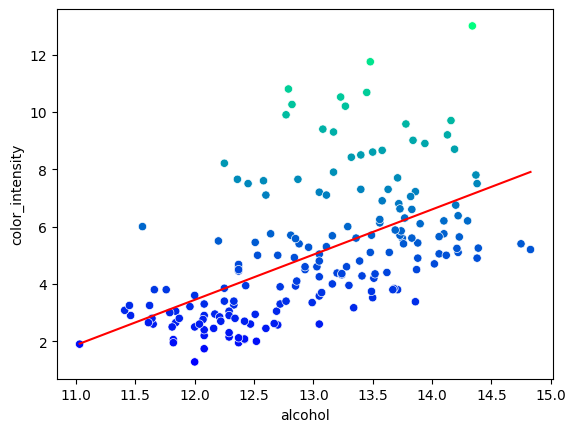

In [69]:
import seaborn as sns
axes = sns.scatterplot(data=df_wine ,x="alcohol", y="color_intensity", hue = "color_intensity", palette = "winter",legend=False)

import numpy as np

x = np.array([min(df_wine.alcohol.values),max(df_wine.alcohol.values)])
y = predice(x)

import matplotlib.pyplot as plt

line = plt.plot(x,y,color="red")

## 15.5 Regresion lineal multiple con los datos de California

### 15.5.1 Cargar el dataset

In [70]:
from sklearn.datasets import fetch_california_housing

In [71]:
california = fetch_california_housing() #Este es el dataset de train.csv, uno muy famoso de datos de las casas de california del 1990 integrado como libreria en sklearn

In [72]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [73]:
california.data.shape # La forma (estructura) de la matriz de características

(20640, 8)

In [74]:
california.target.shape # La forma (estructura) del vector objetivo

(20640,)

In [75]:
california.feature_names #Titulo de las columnas

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

### 15.5.2 Explorar los datos

Importa Pandas si no lo has hecho, altera las precisiones a 4, max columns a 9 y display width a none

In [76]:
import pandas as pd

In [77]:
pd.set_option("display.precision",4)

In [78]:
pd.set_option("display.max_columns",9)

In [79]:
pd.set_option("display.width",None)

Carga los datos de california en un dataframe

In [80]:
california_df = pd.DataFrame(california.data, columns = california.feature_names)

Agrega el target de california al mismo dataframe como una columna (Serie) adicional

In [81]:
california_df["Target"]=california.target
# Crea una MUESTRA ALEATORIA (subconjunto) del 10% (frac=0.1) del dataset total, 
# asegurando la reproducibilidad con random_state=17

Checa el head de california

In [82]:
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.9841,1.0238,322.0,2.5556,37.88,-122.23,4.526
1,8.3014,21.0,6.2381,0.9719,2401.0,2.1098,37.86,-122.22,3.585
2,7.2574,52.0,8.2881,1.0734,496.0,2.8023,37.85,-122.24,3.521
3,5.6431,52.0,5.8174,1.0731,558.0,2.5479,37.85,-122.25,3.413
4,3.8462,52.0,6.2819,1.0811,565.0,2.1815,37.85,-122.25,3.422


Hagamos un describe para ver que onda

In [83]:
california_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000
mean,3.8707,28.6395,5.4290,1.0967,1425.4767,3.0707,35.6319,-119.5697,2.0686
std,1.8998,12.5856,2.4742,0.4739,1132.4621,10.3860,2.1360,2.0035,1.1540
min,0.4999,1.0000,0.8462,0.3333,3.0000,0.6923,32.5400,-124.3500,0.1500
25%,2.5634,18.0000,4.4407,1.0061,787.0000,2.4297,33.9300,-121.8000,1.1960
50%,3.5348,29.0000,5.2291,1.0488,1166.0000,2.8181,34.2600,-118.4900,1.7970
75%,4.7432,37.0000,6.0524,1.0995,1725.0000,3.2823,37.7100,-118.0100,2.6472
max,15.0001,52.0000,141.9091,34.0667,35682.0000,1243.3333,41.9500,-114.3100,5.0000


### 15.5.3 Visualizar los datos

Vamos a armar un muestreo del 10% del dataset para ver mas facil las visualizaciones

In [84]:
muestra_cal_df = california_df.sample(frac=0.1,random_state=17) 
# Crea una MUESTRA ALEATORIA (subconjunto) del 10% (frac=0.1) del dataset total, 
# asegurando la reproducibilidad con random_state=17.

Importa Matplotlib

In [85]:
import matplotlib.pyplot as plt

IMporta Seaborn

In [86]:
import seaborn as sns

Cambia la fuente de seaborn

In [87]:
sns.set(font_scale=2)

Ponlo tipo Whitegrid

In [88]:
sns.set_style("whitegrid")

Arma graficas de precio vs cada feature

C:\Users\Abri\AppData\Local\Temp\ipykernel_16300\1395219974.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=muestra_cal_df, x = feature, y = "Target", palette="Winter",legend=False)
C:\Users\Abri\AppData\Local\Temp\ipykernel_16300\1395219974.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=muestra_cal_df, x = feature, y = "Target", palette="Winter",legend=False)
C:\Users\Abri\AppData\Local\Temp\ipykernel_16300\1395219974.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=muestra_cal_df, x = feature, y = "Target", palette="Winter",legend=False)
C:\Users\Abri\AppData\Local\Temp\ipykernel_16300\1395219974.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=muestra_cal_df, x = feature, y = "Target", palette="Winter",legend=False)
C:\Users\Abri\AppData\Local\Temp\ipykern

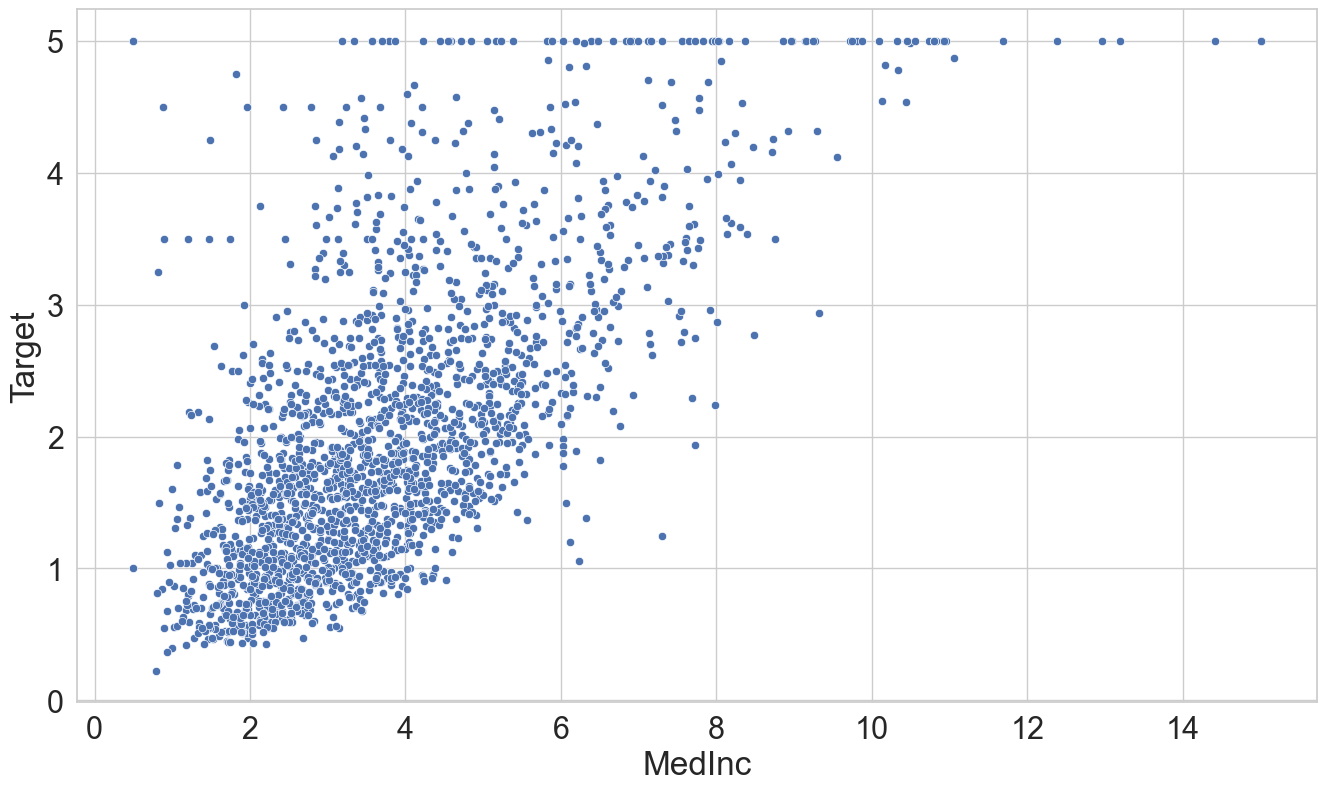

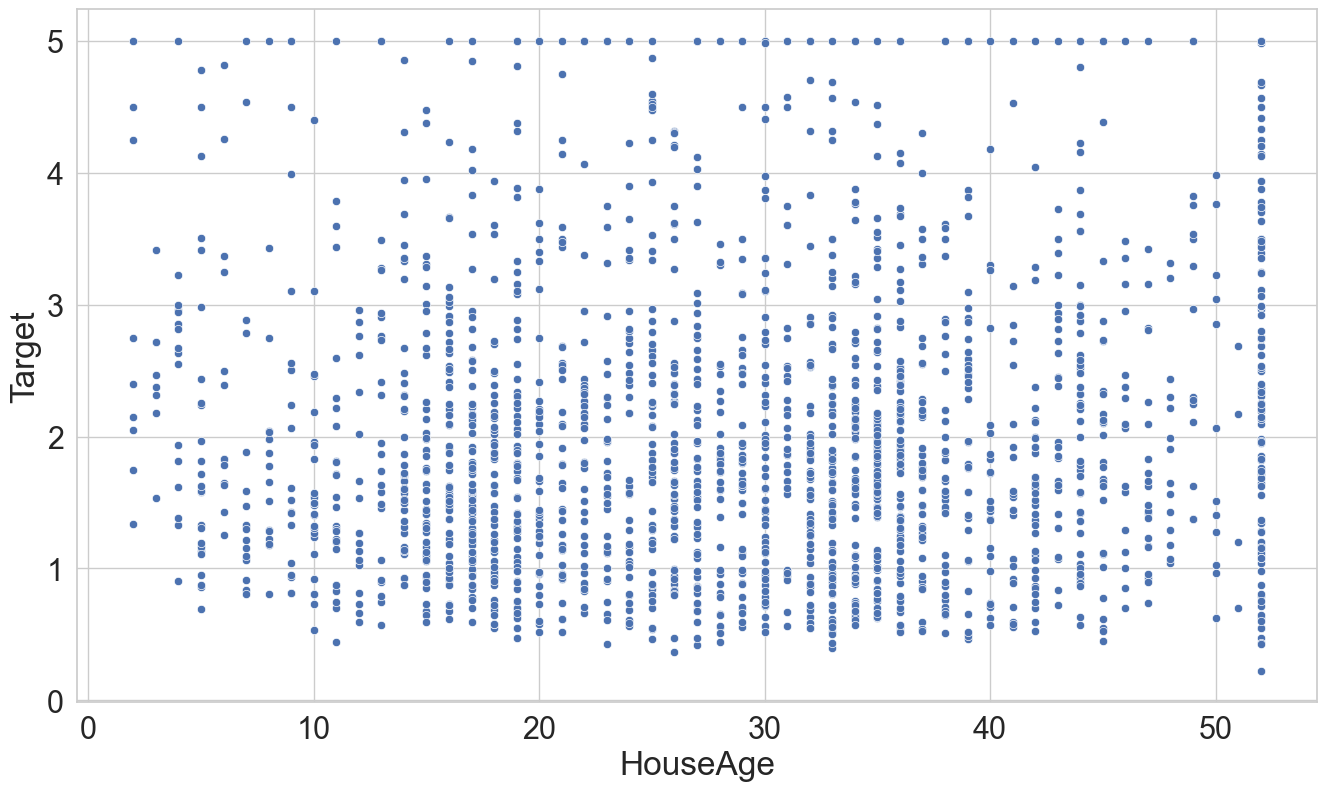

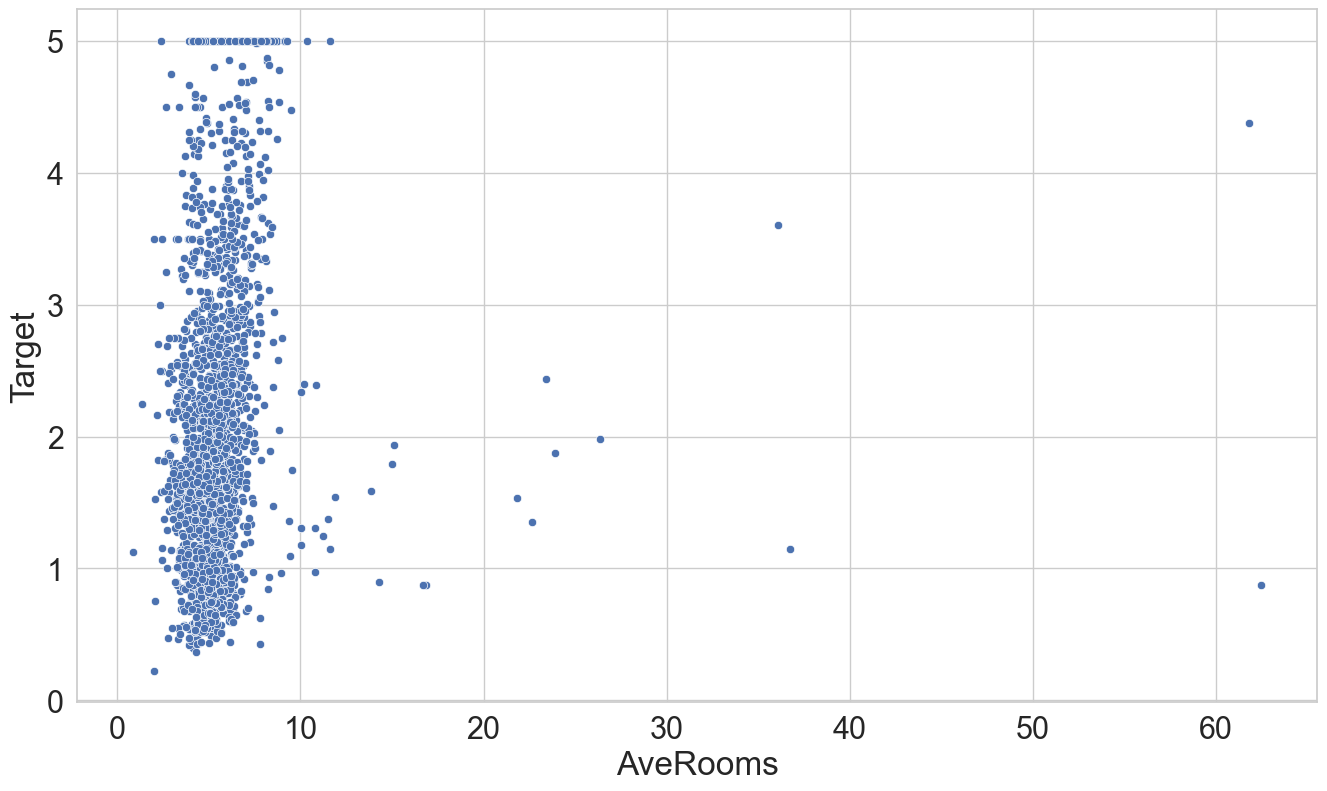

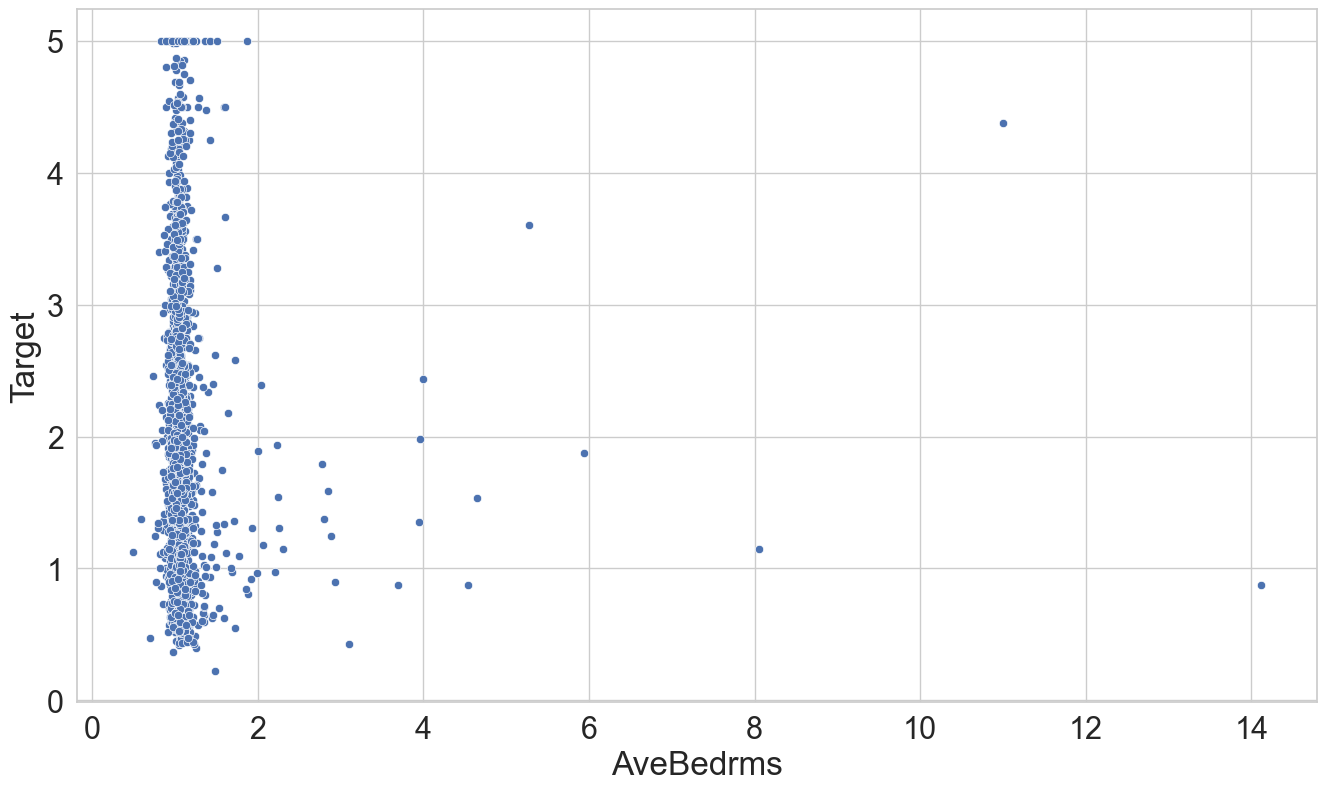

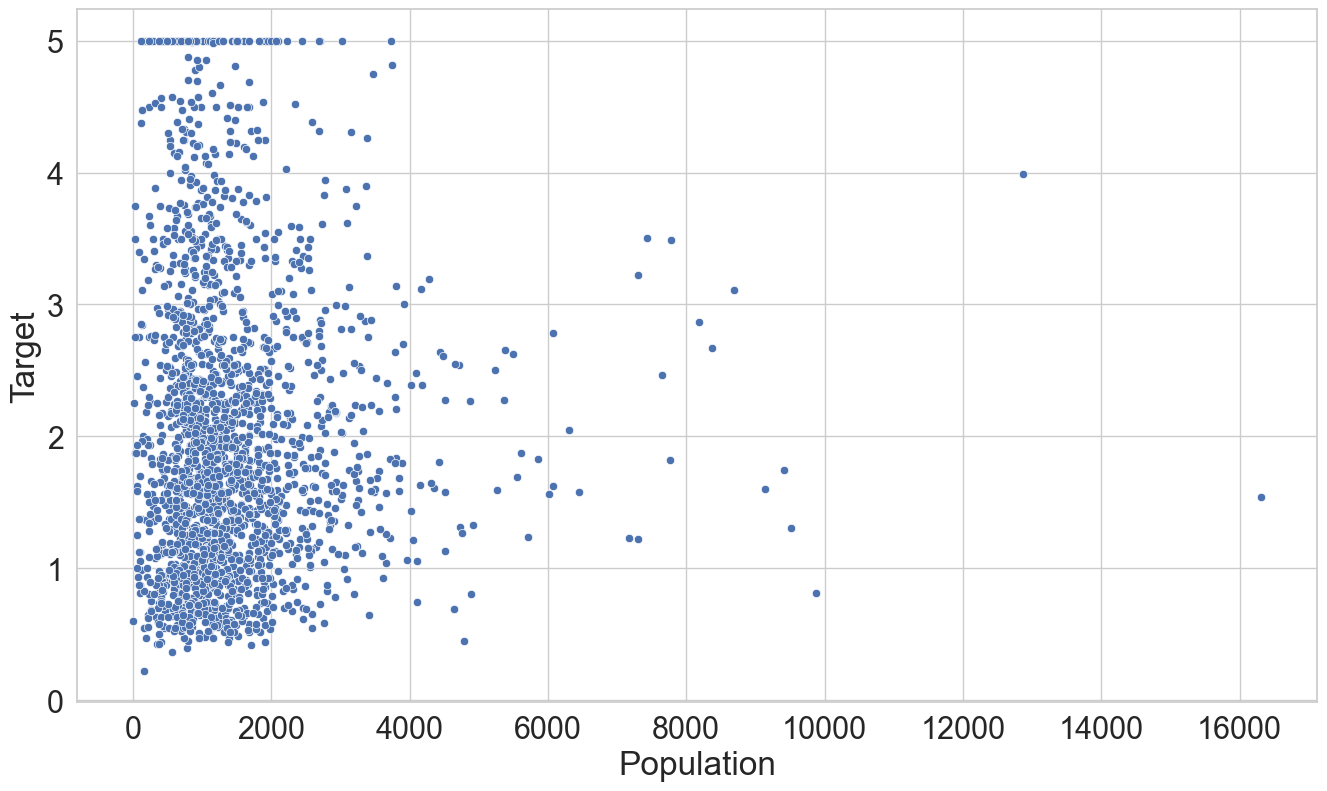

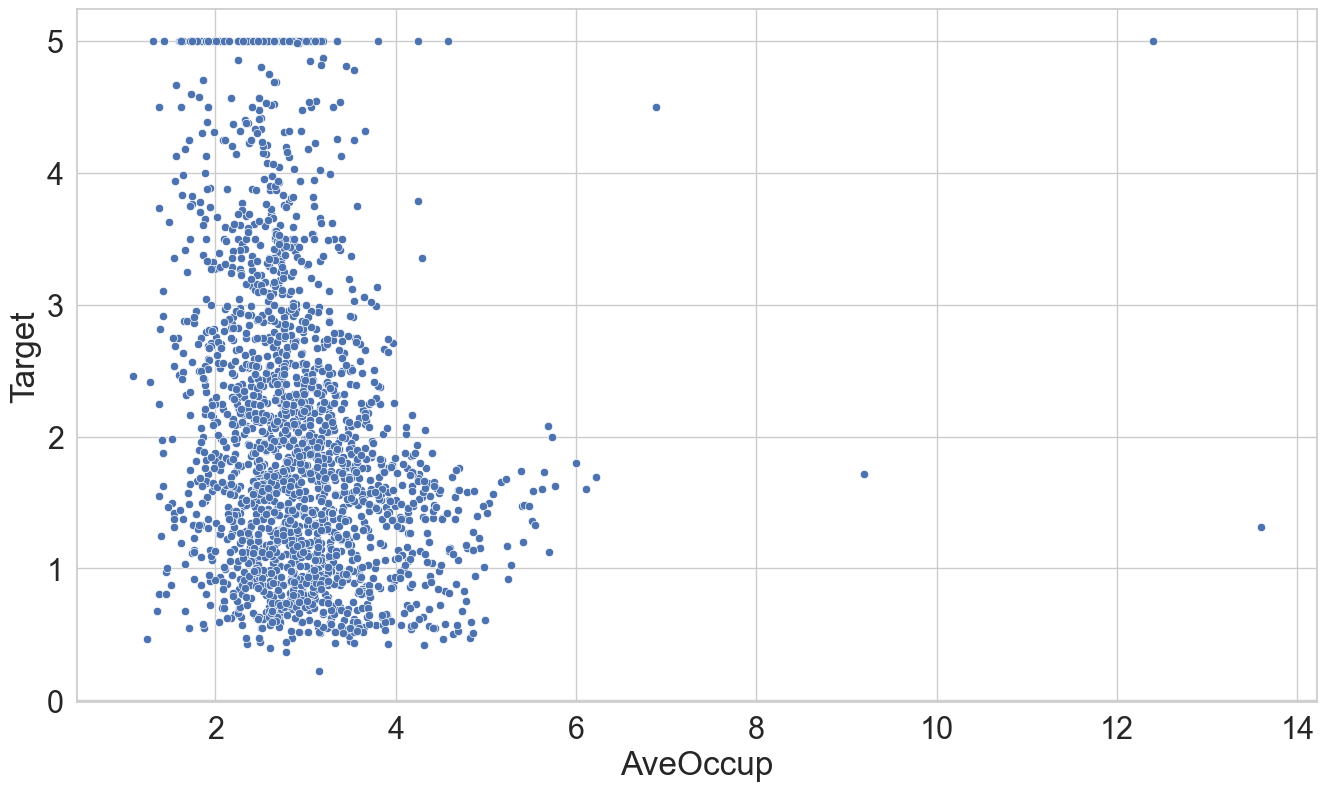

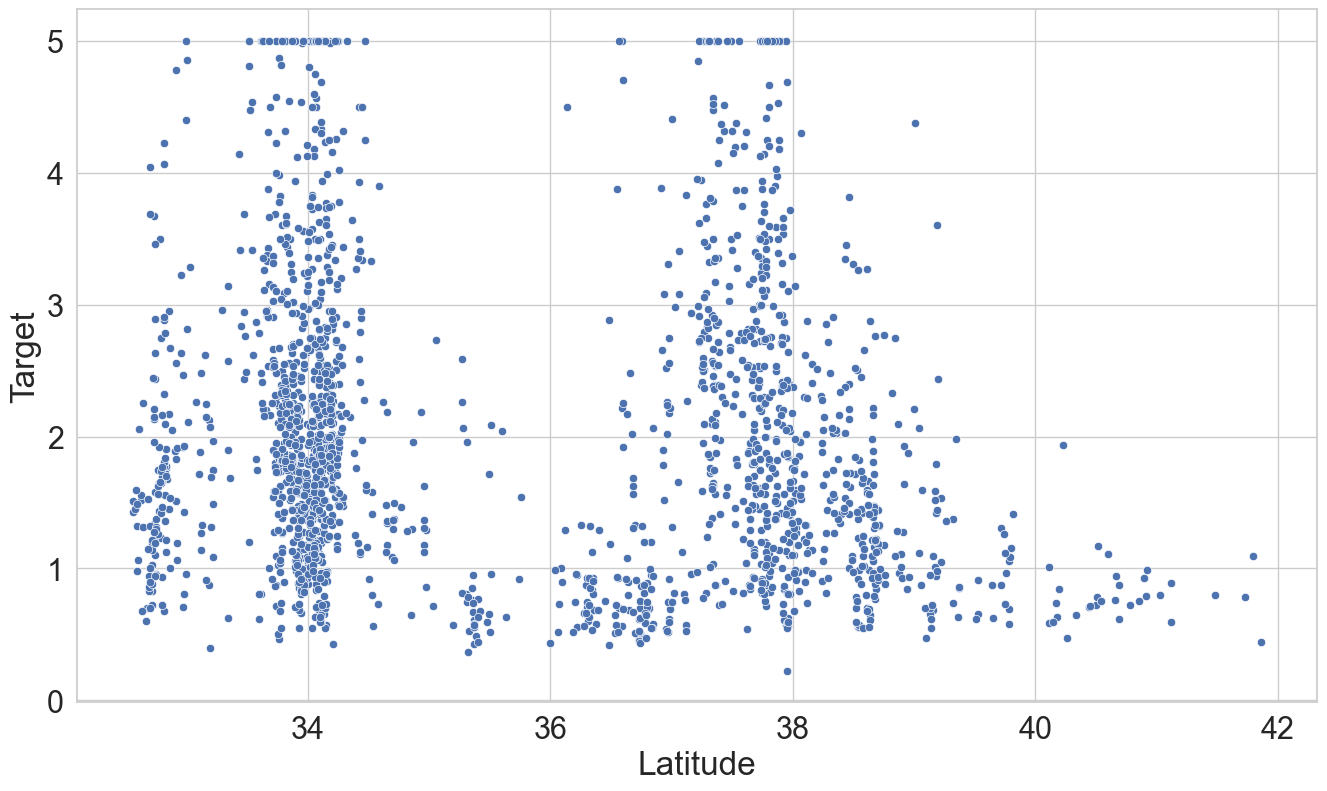

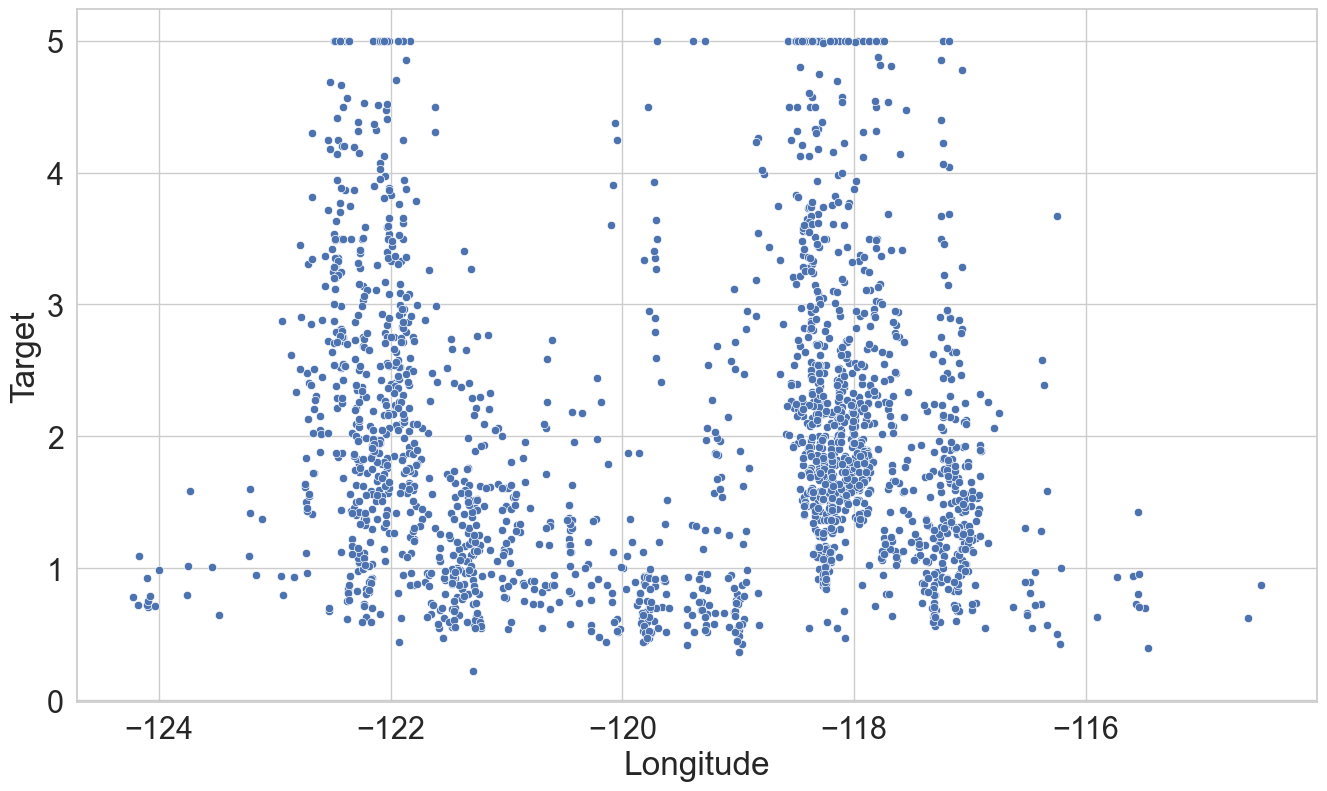

In [89]:
for feature in california.feature_names:
    plt.figure(figsize=(16,9))
    sns.scatterplot(data=muestra_cal_df, x = feature, y = "Target", palette="Winter",legend=False)

### 15.5.4 Separar los datos para training y pruebas

Importa de sklearn.model_selection el train_test_split

In [90]:
from sklearn.model_selection import train_test_split

Arma tu train test split

In [91]:
X_train, X_test, y_train, y_test = train_test_split(california.data, california.target,random_state = 11)
# Divide aleatoriamente el conjunto de datos de California Housing en cuatro subconjuntos: 
# características de entrenamiento (X_train), características de prueba (X_test), 
# valores objetivo de entrenamiento (y_train) y valores objetivo de prueba (y_test).

Checa las figura de train

In [92]:
X_train.shape

(15480, 8)

Checa la figura de test

In [93]:
X_test.shape

(5160, 8)

### 15.5.5 Entrenar el modelo

Importa LinearRegression desde sklearn.linear_model

In [94]:
from sklearn.linear_model import LinearRegression

arma tu objeto reglin

In [95]:
reglin = LinearRegression()

Haz el fit

In [96]:
reglin.fit(X=X_train, y=y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Arma tu for para enumerar todos los coeficientes

In [97]:
for i,name in enumerate(california.feature_names):
    print(f'{name:>10}: {reglin.coef_[i]}')

# Itera sobre los nombres de las 8 características del dataset de California Housing e imprime
# el nombre de la característica y su coeficiente de regresión (peso) asignado por el modelo.

    MedInc: 0.43770302153822027
  HouseAge: 0.009216834565797959
  AveRooms: -0.10732526637360937
 AveBedrms: 0.6117133073918071
Population: -5.756822009277476e-06
  AveOccup: -0.003384566465716359
  Latitude: -0.4194818609649065
 Longitude: -0.4337713349874012


Obten el intercept

In [98]:
reglin.intercept_ #b

np.float64(-36.882950656055485)

### 15.5.6  Probar el modelo

Arma tu prediccion

In [99]:
prediccion = reglin.predict(X_test)

Arma tu lista de valores esperados

In [100]:
esperados = y_test

vamos a ver las primeras 5 predicciones

In [101]:
prediccion[:5]

array([1.25396876, 2.34693107, 2.03794745, 1.8701254 , 2.53608339])

vs los primeros 5 valores esperados

In [102]:
esperados[:5]

array([0.762, 1.732, 1.125, 1.37 , 1.856])

### 15.5.7  Visualizar los precios esperados vs predecidos

Arma un Dataframe vacio

In [103]:
df = pd.DataFrame()

Agregale una columna con los precios esperados

In [104]:
df["Esperados"] = pd.Series(esperados)

Otra con los precios predichos

In [105]:
df["Predecidos"] = pd.Series(prediccion)

Arma una figura de plt

Metele un scatterplot de seaborn

C:\Users\Abri\AppData\Local\Temp\ipykernel_16300\2169408843.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  axes = sns.scatterplot(data = df, x = "Esperados", y = "Predecidos", palette = "cool", legend = False)


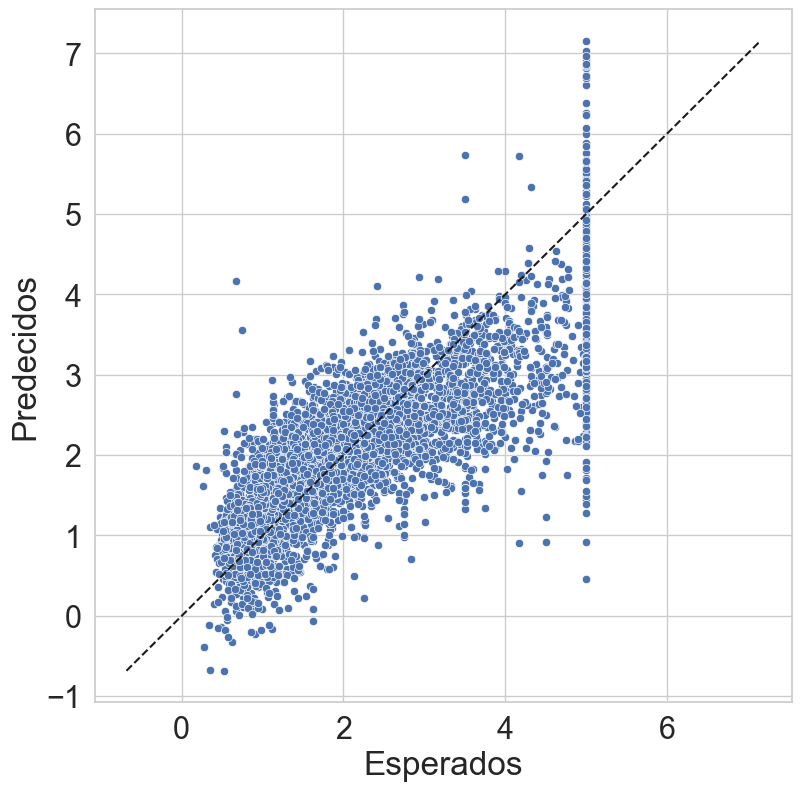

In [106]:
figura = plt.figure(figsize=(9,9))

axes = sns.scatterplot(data = df, x = "Esperados", y = "Predecidos", palette = "cool", legend = False)

start = min(esperados.min(),prediccion.min())
end = max(esperados.max(),prediccion.max())

line = plt.plot([start,end], [start,end], "k--")

### 15.5.8  Métricas del modelo de regresión

Importa metrics de sklearn

In [107]:
from sklearn import metrics
from sklearn.metrics import r2_score


Saca el r2

In [108]:
metrics.r2_score(esperados,prediccion) #60% (Esta muy bien)
#Dato = 1: comparación perfecta
#Dato = 0: comparación nula
#Dato = -1: comparación pefecta inversa

0.6008983115964333

Saca el Mean Squared Error (Promedio de Errores Cuadrados)

In [109]:
metrics.mean_squared_error(esperados,prediccion) # Cuanto más se acerque a 0, menos errores hay

0.5350149774449119

### 15.5.9  Escoger el mejor modelo

In [110]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge

In [111]:
X_train, X_test, y_train, y_test = train_test_split(california.data, california.target,random_state = 11)

In [112]:
model_lasso = Lasso()       # Inicializa el modelo de Regresión Lasso (Regularización L1).
model_ridge = Ridge()       # Inicializa el modelo de Regresión Ridge (Regularización L2).
model_elastic = ElasticNet() # Inicializa el modelo de Regresión ElasticNet (Combinación L1 y L2).

In [113]:
model_lasso.fit(X_train, y_train)

,alpha,1.0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [114]:
model_ridge.fit(X_train, y_train)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [115]:
model_elastic.fit(X_train, y_train)

,alpha,1.0
,l1_ratio,0.5
,fit_intercept,True
,precompute,False
,max_iter,1000
,copy_X,True
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [116]:
# Hacemos predicciones
y_pred_lasso = model_lasso.predict(X_test)
y_pred_ridge = model_ridge.predict(X_test)
y_pred_elastic = model_elastic.predict(X_test)

# Calculamos R²
r2_lasso = r2_score(y_test, y_pred_lasso)
r2_ridge = r2_score(y_test, y_pred_ridge)
r2_elastic = r2_score(y_test, y_pred_elastic)

In [117]:
print(f"Lasso R²: {r2_lasso:.2%}")
print(f"Ridge R²: {r2_ridge:.2%}")
print(f"ElasticNet R²: {r2_elastic:.2%}")

Lasso R²: 28.22%
Ridge R²: 60.09%
ElasticNet R²: 41.80%


Otra manera de hacerlo:

In [118]:
estimadores = {"Regin":LinearRegression(), "ElasticNet": ElasticNet(),"Lasso": Lasso(),"Ridge":Ridge()}
from sklearn.model_selection import KFold, cross_val_score

for promest,objest in estimadores.items():
    kfold = KFold(n_splits=10,random_state=11,shuffle=True)
    puntuajes = cross_val_score(estimator=objest, X = california.data, y = california.target, cv = kfold, scoring = "r2")
    print(f'{promest:>16}:' + f'Promedio de puntuajes R2={puntuajes.mean():.2%}')

           Regin:Promedio de puntuajes R2=59.94%
      ElasticNet:Promedio de puntuajes R2=42.25%
           Lasso:Promedio de puntuajes R2=28.45%
           Ridge:Promedio de puntuajes R2=59.94%


🧠 Explicación rápida

Lasso (L1) tiende a eliminar variables irrelevantes (coeficientes → 0).

Ridge (L2) reduce la magnitud de los coeficientes pero no los elimina.

ElasticNet combina ambos: buen equilibrio si tienes muchas variables correlacionadas.

Ajustar los hiperparametros para limpiar lo máximo posible la estimación que se busca.

In [119]:
# Usamos random_state=42 para reproducibilidad
X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size=0.3, random_state=42)

In [120]:
from sklearn.linear_model import Ridge

In [121]:
# Definir el modelo: Ridge Regression
ridge_regressor = Ridge(random_state=42)

In [122]:
# Definir la cuadrícula de hiperparámetros a buscar para 'alpha'
# Estos valores representan diferentes intensidades de regularización.
# 0.001 es casi ninguna regularización (cercano a Regresión Lineal), 100.0 es muy fuerte.
param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}

In [123]:
from sklearn.model_selection import GridSearchCV

In [124]:
# Configurar GridSearchCV para la búsqueda de hiperparámetros
# cv=5: Validación cruzada de 5 pliegues.
# scoring='neg_mean_squared_error': Buscamos el menor error cuadrático medio (el mejor negativo).
grid_search = GridSearchCV(
    estimator=ridge_regressor,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=0,
    n_jobs=-1
)

In [125]:
# Entrenar el modelo con la búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

,estimator,Ridge(random_state=42)
,param_grid,"{'alpha': [0.001, 0.01, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,0.001


In [126]:
# Obtener el mejor modelo y su rendimiento
best_ridge = grid_search.best_estimator_
y_pred_tuned = best_ridge.predict(X_test)

In [127]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [128]:
# Métricas del modelo optimizado
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
rmse_tuned = np.sqrt(mse_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

In [129]:
# Resultados
print("--- Resultados de la Optimización con Ridge Regression (GridSearchCV) ---")
print(f"Mejor Hiperparámetro (alpha): {grid_search.best_params_['alpha']:.3f}")
print(f"RMSE (Ridge Optimizado): {rmse_tuned:.4f} (El valor a minimizar)")
print(f"R² (Ridge Optimizado): {r2_tuned:.4f} (El valor a maximizar)")

print("\n--- Coeficientes del Mejor Modelo Ridge ---")
for name, coef in zip(california.feature_names, best_ridge.coef_):
    print(f'{name:>10}: {coef:.4f}')

--- Resultados de la Optimización con Ridge Regression (GridSearchCV) ---
Mejor Hiperparámetro (alpha): 0.001
RMSE (Ridge Optimizado): 0.7284 (El valor a minimizar)
R² (Ridge Optimizado): 0.5958 (El valor a maximizar)

--- Coeficientes del Mejor Modelo Ridge ---
    MedInc: 0.4458
  HouseAge: 0.0097
  AveRooms: -0.1221
 AveBedrms: 0.7786
Population: -0.0000
  AveOccup: -0.0034
  Latitude: -0.4185
 Longitude: -0.4337


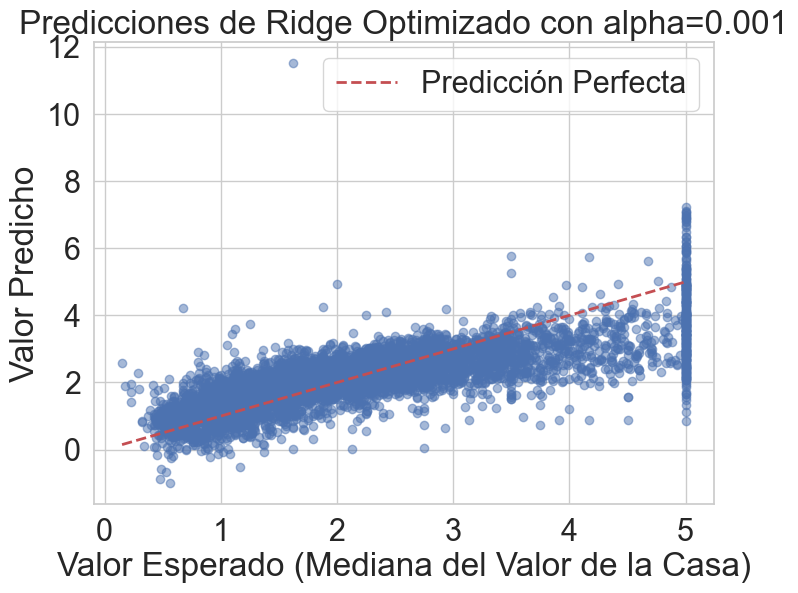

In [130]:
# Visualización
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_tuned, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Predicción Perfecta')
plt.xlabel("Valor Esperado (Mediana del Valor de la Casa)")
plt.ylabel("Valor Predicho")
plt.title(f"Predicciones de Ridge Optimizado con alpha={grid_search.best_params_['alpha']:.3f}")
plt.legend()
plt.show()

## 15.6 Aprendizaje no supervisado parte 1

Importa load_diabetes (de nuevo) desde sklearn.datasets

In [131]:
from sklearn.datasets import load_diabetes

arma tu objeto load_digits

In [132]:
diabetes = load_diabetes()

Importa TSNE desde sklearn.manifold

In [133]:
from sklearn.manifold import TSNE

arma tu objeto tsne

In [134]:
tsne = TSNE(n_components = 2, random_state = 11)
# Inicializa el modelo t-SNE. Configura la reducción de dimensionalidad para proyectar los datos a 2 dimensiones (2D) 
# y establece una semilla aleatoria para asegurar la reproducibilidad de los resultados.

Transforma tus datos al numero especifico de dimensiones y entrena al estimador

In [135]:
datos_reducidos = tsne.fit_transform(diabetes.data)

Checa la forma de tus datos

In [136]:
datos_reducidos.shape

(442, 2)

Vamos a mostrar los datos uasndo el scatter de matplotlib, importa matplotlib

In [137]:
import matplotlib.pyplot as plt 

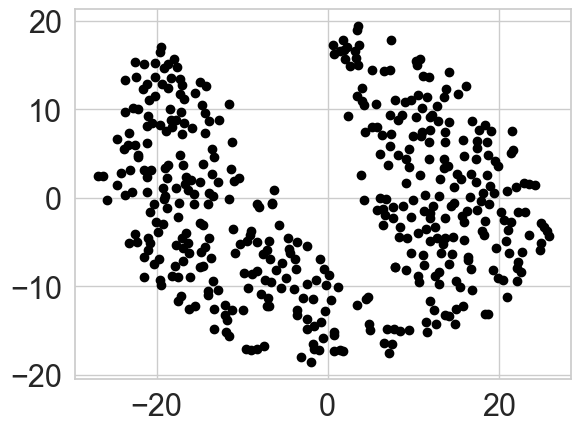

In [138]:
dots = plt.scatter(datos_reducidos[:,0],datos_reducidos[:,1],c="black") #No sabemos ni que es cada eje pero sabemos que ya ha separado en n grupos

Y el sacatter

Ahora haz el scatter con colores diferentes

C:\Users\Abri\AppData\Local\Temp\ipykernel_16300\3335248548.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  dots =plt.scatter(datos_reducidos[:,0],datos_reducidos[:,1],c=diabetes.target, cmap=plt.cm.get_cmap("nipy_spectral_r",10))


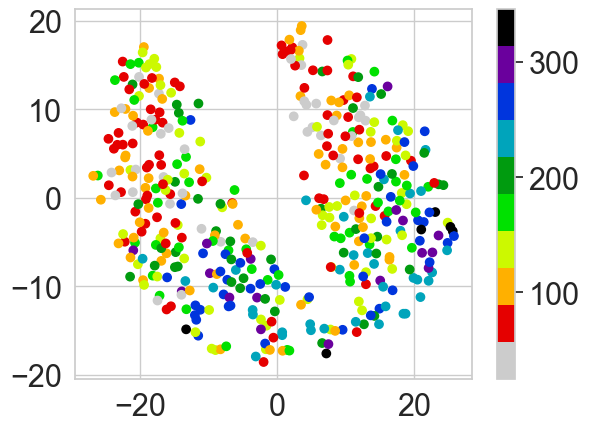

In [139]:
dots =plt.scatter(datos_reducidos[:,0],datos_reducidos[:,1],c=diabetes.target, cmap=plt.cm.get_cmap("nipy_spectral_r",10))
colorbar = plt.colorbar(dots)

#Hemos hecho clustering (agrupaciones de cosas parecidas)

## 15.7 Aprendizaje no supervisado parte 2

### 15.7.1  Cargar el Dataset de Breast Cancer

Carga load_breast_cancer de sklearn.datasets

In [140]:
from sklearn.datasets import load_breast_cancer

Arma un objeto breast_cancer de load_breast_cancer

In [141]:
breast_cancer = load_breast_cancer()

Veamos la descripción del dataset

In [142]:
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer Wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

Veamos la figura del breast_cancer

In [143]:
breast_cancer.data.shape

(569, 30)

La figura del breast_cancer.shape

In [144]:
breast_cancer.target.shape

(569,)

Conozcamos los posibles targets con target_names

In [145]:
breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

Y también los feature names

In [146]:
breast_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

### 15.7.2  Explorar el dataset de Breast_Cancer

Importamos pandas

In [147]:
import pandas as pd

Le decimos que maximo 5 columans

In [148]:
pd.set_option("display.max_columns",5)

Y sin display width

In [149]:
pd.set_option("display.width",None)

Cargamos un dataframe con breast_cancer.data

In [150]:
breast_cancer_df = pd.DataFrame(breast_cancer.data,columns=breast_cancer.feature_names)

Y le pegamos las especies que vienen de breast_cancer.target_names

In [151]:
breast_cancer_df["tipos"] = [breast_cancer.target_names[i] for i in breast_cancer.target]

Checa el head del dataset

In [152]:
breast_cancer_df.head()

,mean radius,mean texture,...,worst fractal dimension,tipos
0,17.99,10.38,...,0.1189,malignant
1,20.57,17.77,...,0.0890,malignant
2,19.69,21.25,...,0.0876,malignant
3,11.42,20.38,...,0.1730,malignant
4,20.29,14.34,...,0.0768,malignant


Pon la precision de pandas a 2 decimales

In [153]:
pd.set_option("display.precision",2)

Armate un describe del dataframe

In [154]:
breast_cancer_df.describe()

,mean radius,mean texture,...,worst symmetry,worst fractal dimension
count,569.00,569.00,...,569.00,569.00
mean,14.13,19.29,...,0.29,0.08
std,3.52,4.30,...,0.06,0.02
min,6.98,9.71,...,0.16,0.06
25%,11.70,16.17,...,0.25,0.07
50%,13.37,18.84,...,0.28,0.08
75%,15.78,21.80,...,0.32,0.09
max,28.11,39.28,...,0.66,0.21


Y un describe de la columna de species solamente

In [155]:
breast_cancer_df["tipos"].describe()

count        569
unique         2
top       benign
freq         357
Name: tipos, dtype: object

### 15.7.3  Visualizar el Dataset con Pairplot

Importa seaborn si no lo has hecho

In [156]:
import seaborn as sns

Cambia la fuente a 1.1

In [157]:
sns.set(font_scale=1.1)

Ponlo estilo whitegrid

In [158]:
sns.set_style("whitegrid")

Arma tu pairplot en un objeto llamado cuadricula

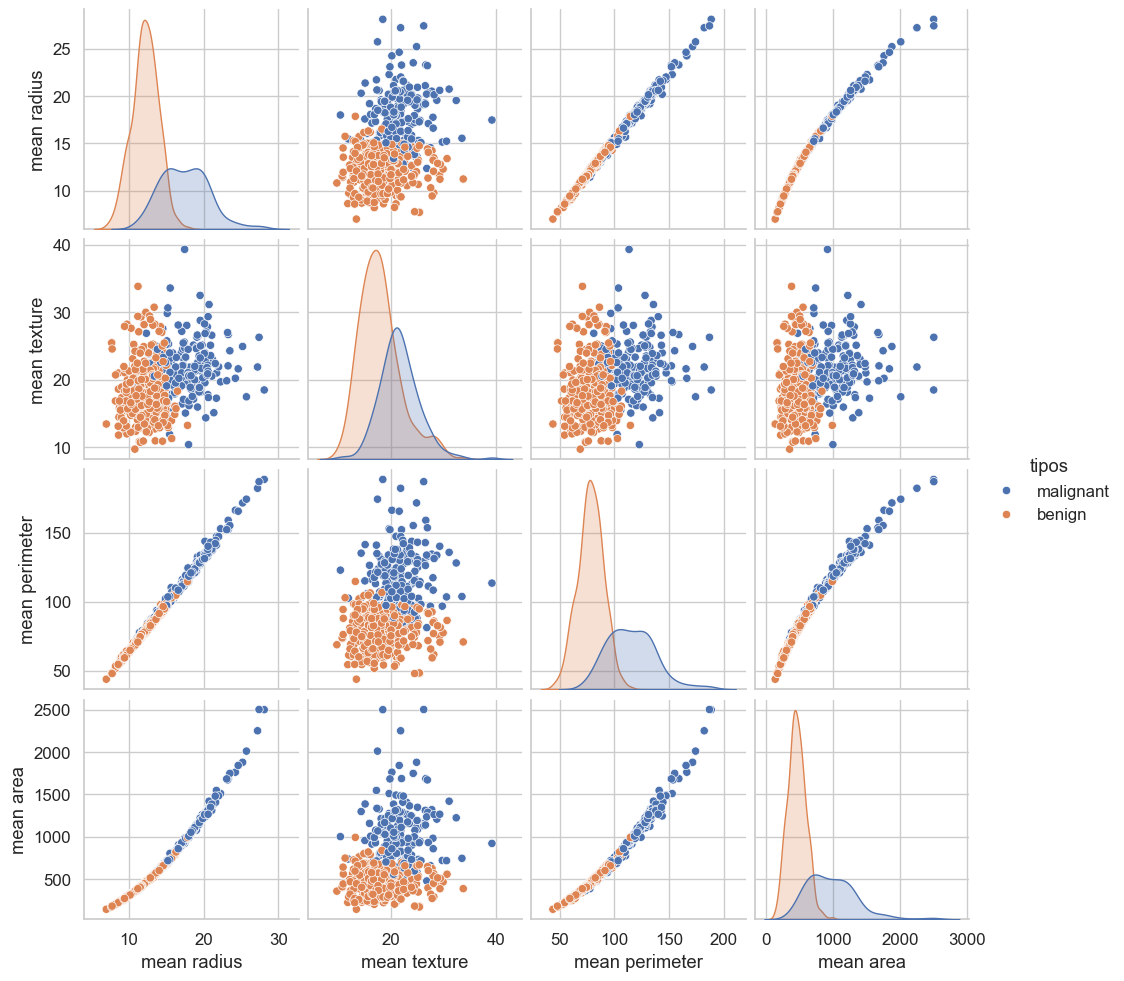

In [159]:
cuadricula_pairplot = sns.pairplot(data = breast_cancer_df, vars = breast_cancer_df.columns[0:4], hue = "tipos") #COmprensión de gráfica a 4 dimensiones

Ahora mostremos el pairplot en un solo color

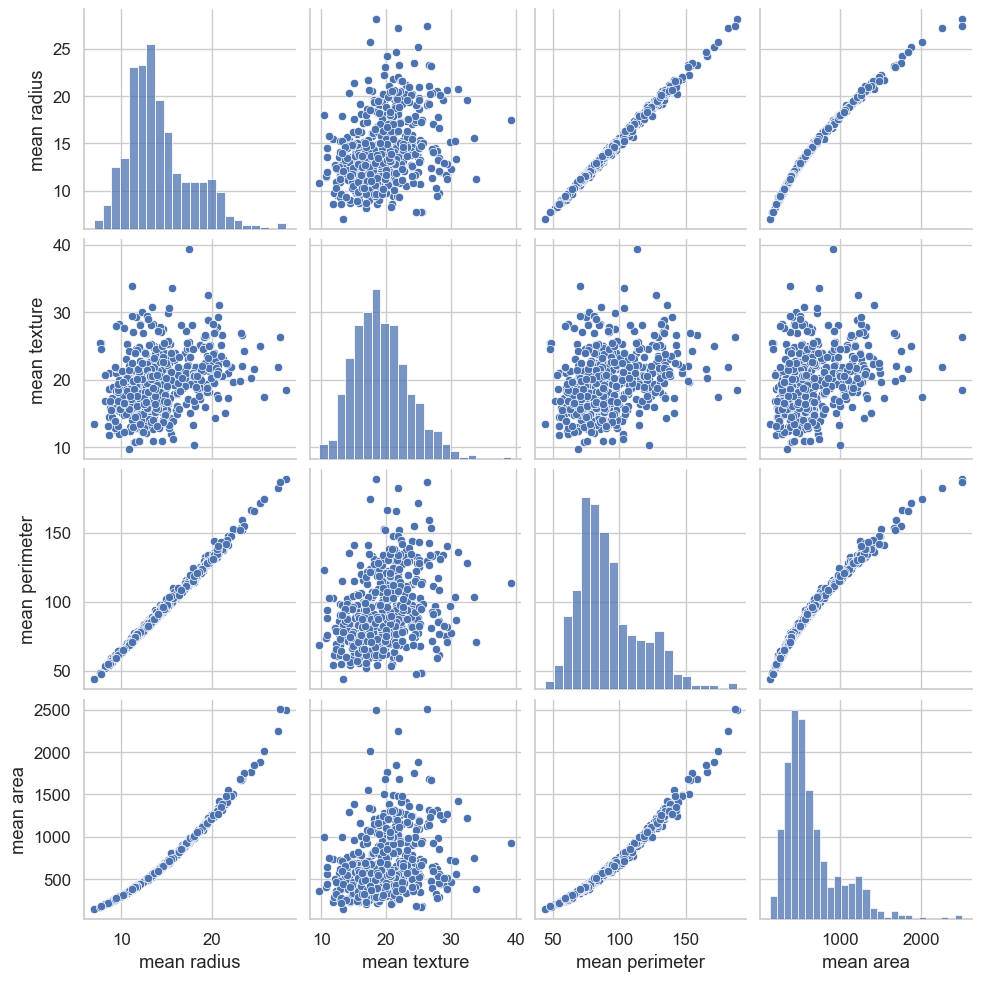

In [160]:
cuadricula_pairplot = sns.pairplot(data = breast_cancer_df, vars = breast_cancer_df.columns[0:4]) 

### 15.7.4  Usar un estimador KMeans

Vamos a importar Kmeans desde sklearn.cluster

In [161]:
from sklearn.cluster import KMeans

Ahora creamos el estimador

In [162]:
kmeans = KMeans(n_clusters = 2, random_state = 11) #El nº de grupos que se con anterioridad que hay (En este caso hay 2)

Entrenamos el modelo con el metodo .fit

In [163]:
kmeans.fit(breast_cancer.data)

,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,11
,copy_x,True
,algorithm,'lloyd'


Imprimimos los primeros 50 resultados

In [164]:
print(kmeans.labels_[:50])

[1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0
 0 0 0 0 0 1 0 0 1 0 0 0 0]


Ahora los segundos 50

In [165]:
print(kmeans.labels_[50:100])

[0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0
 1 0 0 0 0 0 0 0 1 0 0 0 0]


Y los ultimos 50

In [166]:
print(kmeans.labels_[-50:])

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 0 1 0]


### 15.7.4  Reducción de dimensionalidad con PCA

Importa PCA de sklearn.decomposition

In [167]:
from sklearn.decomposition import PCA

Arma tu estimador PCA

In [168]:
pca = PCA(n_components = 2, random_state = 11)

Arma el fit

In [169]:
pca.fit(breast_cancer.data)

,n_components,2
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,11


Y luego transforma los datos usando transform

In [170]:
breast_cancer_pca = pca.transform(breast_cancer.data)
# Proyecta (transforma) los datos originales de alta dimensión (breast_cancer.data) al nuevo espacio de menor dimensión creado por el modelo PCA.

In [171]:
pca.transform?

Signature: pca.transform(X)
Docstring:
Apply dimensionality reduction to X.

X is projected on the first principal components previously extracted
from a training set.

Parameters
----------
X : {array-like, sparse matrix} of shape (n_samples, n_features)
    New data, where `n_samples` is the number of samples
    and `n_features` is the number of features.

Returns
-------
X_new : array-like of shape (n_samples, n_components)
    Projection of X in the first principal components, where `n_samples`
    is the number of samples and `n_components` is the number of the components.
File:      c:\users\abri\appdata\roaming\python\python312\site-packages\sklearn\decomposition\_base.py
Type:      method

checa la figura de los datos que devolvió

In [172]:
breast_cancer_pca.shape

(569, 2)

Veamos losd datos reducidos, pasa esos nuevos datos a un dataframe

In [173]:
breast_cancer_pca_df = pd.DataFrame(breast_cancer_pca, columns = ["Componente1","Componente2"])
# Convierte la matriz de datos de PCA (breast_cancer_pca) en un DataFrame de Pandas,
# asignando nombres descriptivos ("Componente1" y "Componente2") a las nuevas columnas de baja dimensión.

pegale la especie a ese dataframe

In [174]:
breast_cancer_pca_df["tipos"] = breast_cancer_df.tipos

In [175]:
breast_cancer_pca_df.head()

,Componente1,Componente2,tipos
0,1160.14,-293.92,malignant
1,1269.12,15.63,malignant
2,995.79,39.16,malignant
3,-407.18,-67.38,malignant
4,930.34,189.34,malignant


arma un scatterplot en seaborn

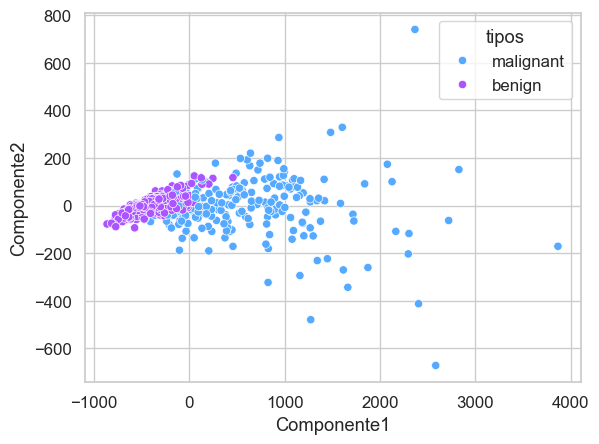

In [176]:
axes = sns.scatterplot(data = breast_cancer_pca_df, x = "Componente1", y = "Componente2", hue = "tipos", legend = "brief", palette = "cool")
# Crea un gráfico de dispersión (scatterplot) para visualizar las dos primeras Componentes Principales. 
# Los puntos se colorean según la variable objetivo ("tipos"), revelando la separación de las clases.

Vamos armando un objeto centroide para mostrar en seaborn

In [177]:
breast_cancer_centros = pca.transform(kmeans.cluster_centers_) #Los centros de los cluster

In [178]:
breast_cancer_centros

array([[-3.06510219e+02, -4.74773896e-01],
       [ 1.02482043e+03,  1.58741196e+00]])

importa matplotlib

In [179]:
import matplotlib.pyplot as plt

Muestra los scatter

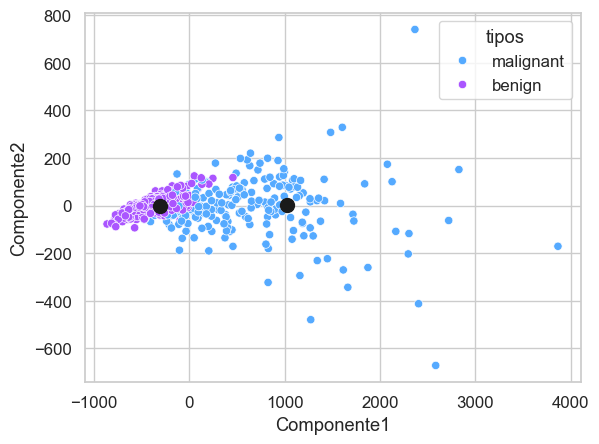

In [180]:
axes = sns.scatterplot(data = breast_cancer_pca_df, x = "Componente1", y = "Componente2", hue = "tipos", legend = "brief", palette = "cool")

dots = plt.scatter(breast_cancer_centros[:,0], breast_cancer_centros[:,1], s = 100, c = "k") #s-Tamaño, c-Color

#Visualizamos los centros

### 15.7.4  Escoger el mejor estimador de CLustering

importa DBSCAN, Meanshift, spectral clustering, agglomerative clustering

In [181]:
from sklearn.cluster import DBSCAN, MeanShift, SpectralClustering, AgglomerativeClustering

Arma un diccionario con los estimadores

In [182]:
estimadores = {"KMeans":kmeans, "DBSCAN":DBSCAN(), "MeanShift":MeanShift(), "SpectralClustering":SpectralClustering(n_clusters = 2,affinity='rbf', gamma=0.5), "AgglomerativeClustering":AgglomerativeClustering(n_clusters = 2)}

importa Numpy as np

In [183]:
import numpy as np

arma el for que va a hacer los estimadores

In [184]:
for nombre, estimador in estimadores.items():
    estimador.fit(breast_cancer.data)
    print(f'\n{nombre}:')
    for i in range (0,101,50):
        etiquetas, cuentas = np.unique(estimador.labels_[i:i+50], return_counts = True)
        print(f'{i}-{i+50}:')
        for etiqueta, cuenta in zip(etiquetas,cuentas):
            print(f' etiqueta={etiqueta}, cuenta={cuenta}')
# Itera sobre cada modelo de clustering (estimador) en el diccionario.
# 1. Entrena el modelo en los datos de cáncer de mama.
# 2. Muestra el conteo de las etiquetas de cluster asignadas para las primeras 101 muestras del dataset (en bloques de 50).


KMeans:
0-50:
 etiqueta=0, cuenta=28
 etiqueta=1, cuenta=22
50-100:
 etiqueta=0, cuenta=38
 etiqueta=1, cuenta=12
100-150:
 etiqueta=0, cuenta=41
 etiqueta=1, cuenta=9

DBSCAN:
0-50:
 etiqueta=-1, cuenta=50
50-100:
 etiqueta=-1, cuenta=50
100-150:
 etiqueta=-1, cuenta=50

MeanShift:
0-50:
 etiqueta=0, cuenta=26
 etiqueta=1, cuenta=20
 etiqueta=2, cuenta=4
50-100:
 etiqueta=0, cuenta=36
 etiqueta=1, cuenta=12
 etiqueta=2, cuenta=2
100-150:
 etiqueta=0, cuenta=38
 etiqueta=1, cuenta=10
 etiqueta=2, cuenta=2


C:\Users\Abri\AppData\Roaming\Python\Python312\site-packages\sklearn\manifold\_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(



SpectralClustering:
0-50:
 etiqueta=0, cuenta=50
50-100:
 etiqueta=0, cuenta=50
100-150:
 etiqueta=0, cuenta=50

AgglomerativeClustering:
0-50:
 etiqueta=0, cuenta=38
 etiqueta=1, cuenta=12
50-100:
 etiqueta=0, cuenta=41
 etiqueta=1, cuenta=9
100-150:
 etiqueta=0, cuenta=44
 etiqueta=1, cuenta=6


Sin saber lo que ha hecho internamente, el meanshift ha dado el mejor resultado de predicción